In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

# Data Preparation

In [2]:
df = pd.read_csv("Train_set.csv")
df = df.drop(columns = ["Unnamed: 0"])

In [3]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",label
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5


In [84]:
attributes = [col for col in df.columns if col != 'label']
X = df[attributes].values
y = df['label']

# Data Partitioning

In [72]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [74]:
X_train.shape

(5146, 561)

# Classification

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.929283771532185
F1-score [0.94101509 0.90766823 0.90759076 0.9009009  0.90709046 0.99881376]
              precision    recall  f1-score   support

           1       0.95      0.93      0.94       368
           2       0.91      0.90      0.91       322
           3       0.89      0.93      0.91       296
           4       0.90      0.91      0.90       386
           5       0.91      0.90      0.91       412
           6       1.00      1.00      1.00       422

    accuracy                           0.93      2206
   macro avg       0.93      0.93      0.93      2206
weighted avg       0.93      0.93      0.93      2206



In [45]:
clf.feature_importances_
imp_dict = {attr: clf.feature_importances_[i] for i, attr in enumerate(attributes)}
imp_dict
attributi = {k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1], reverse=True)}
lista_attributi = list(attributi.items())
lista_attributi[:21]

[('tGravityAcc-mean()-X', 0.22970049260444156),
 ('tBodyAccJerk-std()-X', 0.20454328626210497),
 ('tGravityAcc-max()-Y', 0.13860682957367929),
 ('fBodyAccMag-energy()', 0.11123690783211364),
 ('tGravityAcc-arCoeff()-Z,2', 0.10387845878984206),
 ('fBodyGyro-maxInds-X', 0.021917237382434427),
 ('tBodyGyro-correlation()-Y,Z', 0.01809197967138203),
 ('tBodyAccMag-arCoeff()1', 0.014678717278886068),
 ('tGravityAcc-max()-X', 0.014115474299979183),
 ('tGravityAcc-entropy()-X', 0.012289454068298485),
 ('fBodyAcc-max()-Y', 0.008235932383257979),
 ('tBodyGyro-max()-X', 0.007715571644814719),
 ('tGravityAcc-energy()-Y', 0.007601212424220231),
 ('fBodyGyro-max()-X', 0.006954964342465895),
 ('tBodyGyroJerk-correlation()-X,Y', 0.006798945749192587),
 ('fBodyAcc-bandsEnergy()-1,8', 0.004763146215748791),
 ('tGravityAcc-min()-Y', 0.004590236363802022),
 ('tBodyAcc-correlation()-X,Y', 0.00436429626152428),
 ('tGravityAcc-max()-Z', 0.004221790483912854),
 ('angle(Y,gravityMean)', 0.004072366475253939),


# Variance Threshold

In [63]:
from sklearn.feature_selection import VarianceThreshold

"""• Variance Threshold. It removes all features whose variance does not meet some
threshold. By default, it removes all zero-variance features, i.e. features that have the
same value in all samples."""

'• Variance Threshold. It removes all features whose variance does not meet some\nthreshold. By default, it removes all zero-variance features, i.e. features that have the\nsame value in all samples.'

In [72]:
sel = VarianceThreshold(threshold=(.8 * (1 - .7)))
X_train_sel = sel.fit_transform(X_train)

X_train_sel.shape

(5146, 35)

In [73]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8712601994560291
F1-score [0.86290323 0.84194053 0.86632826 0.81258191 0.82932692 0.99881376]
              precision    recall  f1-score   support

           1       0.85      0.87      0.86       368
           2       0.85      0.84      0.84       322
           3       0.87      0.86      0.87       296
           4       0.82      0.80      0.81       386
           5       0.82      0.84      0.83       412
           6       1.00      1.00      1.00       422

    accuracy                           0.87      2206
   macro avg       0.87      0.87      0.87      2206
weighted avg       0.87      0.87      0.87      2206



# Univariate Feature Selection

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris

"""Univariate Feature Selection. It selects the best features based on univariate statistical
tests. For instance, it removes all but the k highest scoring features. An example of
statistical test is the ANOVA F-value between label/feature."""

'Univariate Feature Selection. It selects the best features based on univariate statistical\ntests. For instance, it removes all but the k highest scoring features. An example of\nstatistical test is the ANOVA F-value between label/feature.'

In [84]:
sel = SelectKBest(k=35) # K = N° di feature desiderato
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

(5146, 35)

In [85]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8980054397098821
F1-score [0.90934066 0.87874016 0.89689034 0.84073107 0.85404101 0.99881376]
              precision    recall  f1-score   support

           1       0.92      0.90      0.91       368
           2       0.89      0.87      0.88       322
           3       0.87      0.93      0.90       296
           4       0.85      0.83      0.84       386
           5       0.85      0.86      0.85       412
           6       1.00      1.00      1.00       422

    accuracy                           0.90      2206
   macro avg       0.90      0.90      0.90      2206
weighted avg       0.90      0.90      0.90      2206



# Recursive Feature Elimination

In [1]:
from sklearn.feature_selection import SelectFromModel

In [79]:
sel = SelectFromModel(DecisionTreeClassifier())
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

(5146, 35)

In [59]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9460562103354487
F1-score [0.95367847 0.92598425 0.92715232 0.92775665 0.93184634 0.99881376]
              precision    recall  f1-score   support

           1       0.96      0.95      0.95       368
           2       0.94      0.91      0.93       322
           3       0.91      0.95      0.93       296
           4       0.91      0.95      0.93       386
           5       0.95      0.91      0.93       412
           6       1.00      1.00      1.00       422

    accuracy                           0.95      2206
   macro avg       0.94      0.94      0.94      2206
weighted avg       0.95      0.95      0.95      2206



# Principal Component Analysis

In [10]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=100)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [24]:
X_train_pca.shape

(5146, 100)

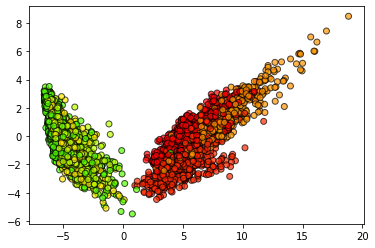

In [25]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [26]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8522212148685403
F1-score [0.89411765 0.87203791 0.85565217 0.73490814 0.76960193 0.98349057]
              precision    recall  f1-score   support

           1       0.86      0.93      0.89       368
           2       0.89      0.86      0.87       322
           3       0.88      0.83      0.86       296
           4       0.74      0.73      0.73       386
           5       0.76      0.77      0.77       412
           6       0.98      0.99      0.98       422

    accuracy                           0.85      2206
   macro avg       0.85      0.85      0.85      2206
weighted avg       0.85      0.85      0.85      2206



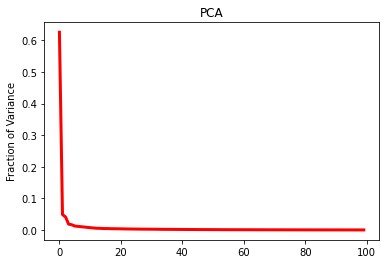

In [26]:
plt.plot(PCA(n_components=100).fit(X).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.show()

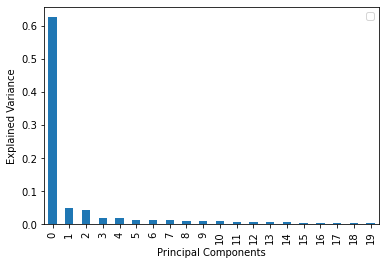

In [27]:
import matplotlib.pyplot as plt
pd.DataFrame(pca.explained_variance_ratio_[0:20]).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance');

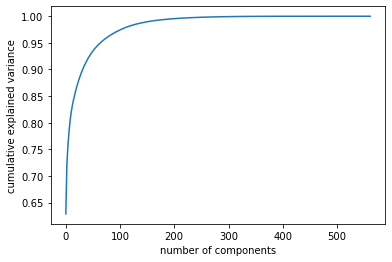

In [28]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Random Subspace Projection

In [86]:
from sklearn import random_projection

In [87]:
rsp = random_projection.GaussianRandomProjection(n_components=100)
X_train_rsp = rsp.fit_transform(X_train)
X_train_rsp.shape

(5146, 100)

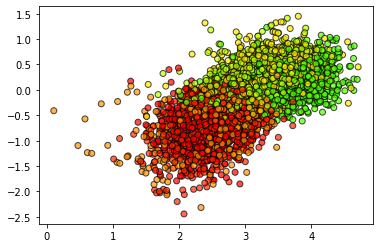

In [88]:
plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, -1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [89]:
X_test_rsp = rsp.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_rsp, y_train)

y_pred = clf.predict(X_test_rsp)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7973708068902992
F1-score [0.82157676 0.79216867 0.79663866 0.6778784  0.75247525 0.93286219]
              precision    recall  f1-score   support

           1       0.84      0.81      0.82       368
           2       0.77      0.82      0.79       322
           3       0.79      0.80      0.80       296
           4       0.68      0.68      0.68       386
           5       0.77      0.74      0.75       412
           6       0.93      0.94      0.93       422

    accuracy                           0.80      2206
   macro avg       0.80      0.80      0.80      2206
weighted avg       0.80      0.80      0.80      2206



# Multi Dimensional Scaling

In [37]:
from sklearn.manifold import MDS

In [ ]:
mds = MDS(n_components=100)
X_train_mds = mds.fit_transform(X_train)
X_train_mds.shape

In [ ]:
plt.scatter(X_train_mds[:, 0], X_train_mds[:, -1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
#X_test_mds = mds.transform(X_test) # no transform

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_mds, y_train)

y_pred = clf.predict(X_train_mds)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

# IsoMap

In [52]:
from sklearn.manifold import Isomap

In [53]:
iso = Isomap(n_components=2)
X_train_iso = iso.fit_transform(X_train)
X_train_iso.shape

(5146, 2)

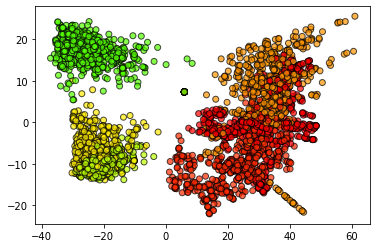

In [54]:
plt.scatter(X_train_iso[:, 0], X_train_iso[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [55]:
#X_test_mds = mds.transform(X_test) # no transform

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_iso, y_train)

y_pred = clf.predict(X_train_iso)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.925767586474932
F1-score [0.92396313 0.93135935 0.92498179 0.88816504 0.89219331 0.99087221]
              precision    recall  f1-score   support

           1       0.91      0.93      0.92       858
           2       0.94      0.92      0.93       751
           3       0.93      0.92      0.92       690
           4       0.87      0.91      0.89       900
           5       0.91      0.87      0.89       962
           6       0.99      0.99      0.99       985

    accuracy                           0.93      5146
   macro avg       0.93      0.93      0.93      5146
weighted avg       0.93      0.93      0.93      5146



# t-SNE

In [13]:
from sklearn.manifold import TSNE

"""t-SNE is a great tool to understand high-dimensional datasets. 
It might be less useful when you want to perform dimensionality reduction 
 for ML training (cannot be reapplied in the same way). 
It’s not deterministic and iterative so each time it runs, 
 it could produce a different result. 
But even with that disadvantages it still remains one 
 of the most popular method in the field."""

't-SNE is a great tool to understand high-dimensional datasets. \nIt might be less useful when you want to perform dimensionality reduction \n for ML training (cannot be reapplied in the same way). \nIt’s not deterministic and iterative so each time it runs, \n it could produce a different result. \nBut even with that disadvantages it still remains one \n of the most popular method in the field.'

In [15]:
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne.shape

(5146, 2)

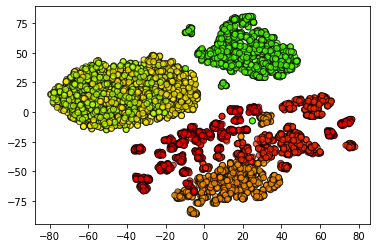

In [16]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [17]:
#X_test_mds = mds.transform(X_test) # no transform

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_tsne, y_train)

y_pred = clf.predict(X_train_tsne)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.9794014768752429
F1-score [0.99649942 0.994004   0.99275362 0.94859038 0.95302714 0.9979716 ]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       858
           2       0.99      0.99      0.99       751
           3       0.99      0.99      0.99       690
           4       0.94      0.95      0.95       900
           5       0.96      0.95      0.95       962
           6       1.00      1.00      1.00       985

    accuracy                           0.98      5146
   macro avg       0.98      0.98      0.98      5146
weighted avg       0.98      0.98      0.98      5146



In [18]:
from sklearn.neighbors import LocalOutlierFactor

In [19]:
clf = LocalOutlierFactor(n_neighbors=2)
outliers = clf.fit_predict(X)

In [20]:
X_train_tsne

array([[ 21.068815, -29.655626],
       [ 37.46103 ,  47.155113],
       [ 32.10299 ,  -3.490554],
       ...,
       [ 31.969002, -38.423344],
       [-38.906696,  12.120429],
       [ 18.950275,  63.8881  ]], dtype=float32)

In [ ]:
df2 = pd.DataFrame(X_train_tsne, columns=["1", "2"])

In [ ]:
df2.head()